In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 10s 1us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

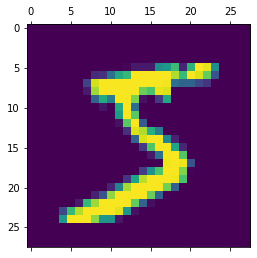

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [16]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 919us/step - loss: 0.4730 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 2s 815us/step - loss: 0.3040 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 2s 862us/step - loss: 0.2838 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 803us/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 1s 795us/step - loss: 0.2665 - accuracy: 0.9259


In [18]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 642us/step - loss: 0.2683 - accuracy: 0.9252


[0.26829615235328674, 0.9251999855041504]

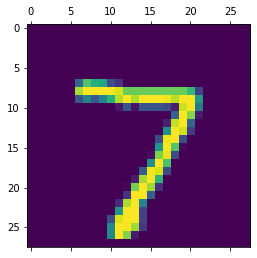

In [19]:
plt.matshow(X_test[0])

In [21]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

array([2.3971915e-02, 4.2573737e-07, 7.4421883e-02, 9.5209330e-01,
       1.8590987e-03, 1.1252755e-01, 2.3160887e-06, 9.9974227e-01,
       1.2845454e-01, 6.3820356e-01], dtype=float32)

In [22]:
np.argmax(y_predicted[0])

7

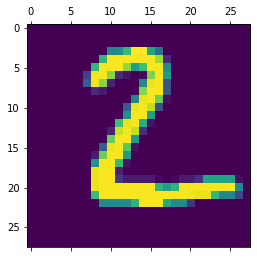

In [23]:
plt.matshow(X_test[1])

In [24]:
np.argmax(y_predicted[1])

2

In [25]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   8,   12,  911,   16,    8,    4,   13,   11,   46,    3],
       [   4,    0,   18,  914,    0,   28,    2,   11,   27,    6],
       [   2,    1,    3,    1,  914,    0,   12,    4,   10,   35],
       [  10,    3,    1,   27,    9,  781,   16,    5,   34,    6],
       [  13,    3,    7,    1,    7,   13,  911,    2,    1,    0],
       [   2,    6,   21,    6,    6,    1,    0,  951,    4,   31],
       [   7,    9,    7,   14,    9,   22,    8,   12,  879,    7],
       [  11,    7,    1,    9,   27,    7,    0,   23,    9,  915]])>

Text(69.0, 0.5, 'Truth')

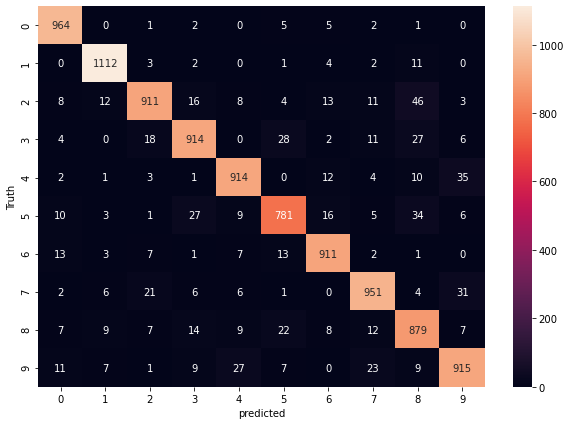

In [28]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [29]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 2s 985us/step - loss: 0.1261 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0860 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.0658 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 2s 991us/step - loss: 0.0500 - accuracy: 0.9847


In [30]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0834 - accuracy: 0.9759


[0.08341909945011139, 0.9758999943733215]

Text(69.0, 0.5, 'Truth')

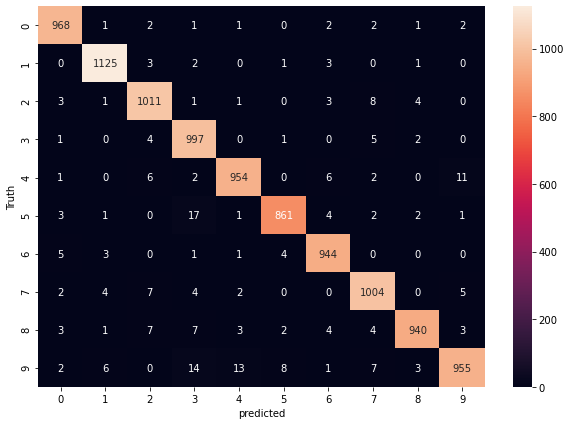

In [31]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [34]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2761 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1242 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0863 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0652 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0520 - accuracy: 0.9840
